urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
from fastai.vision import *
path = Path('data/crossovers')
folder = 'Tiguan' # каталог tiguan и метка для этой категории
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'Sportage' # каталог sportage и метка для этой категории
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'CX-5' # каталог cx-5 и метка для этой категории
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'RAV-4' # каталог rav-4 и метка для этой категории
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

folder = 'RX-330' # каталог tiguan и метка для этой категории
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'FX-35' # каталог sportage и метка для этой категории
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'Outlander' # каталог cx-5 и метка для этой категории
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
folder = 'Qashqai' # каталог rav-4 и метка для этой категории
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)
path.ls()

Теперь загрузим csv-файлы в соответствующие каталоги. Для этого откроем левое меню ноутбука, выберите вкладку Files, и загрузим эти файлы с помощью локального меню.

In [0]:
classes = ['CX-5', 'RAV-4', 'Sportage', 'Tiguan', 'RX-330', 'FX-35', 'Outlander', 'Qashqai']
folder = 'CX-5'
file = folder + '.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=200)
folder = 'RAV-4'
file = folder + '.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=200)
folder = 'Sportage'
file = folder + '.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=200)
folder = 'Tiguan'
file = folder + '.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=200)

folder = 'RX-330'
file = folder + '.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=200)
folder = 'FX-35'
file = folder + '.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=200)
folder = 'Outlander'
file = folder + '.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=200)
folder = 'Qashqai'
file = folder + '.csv'
dest = path/folder
download_images(dest/file, dest, max_pics=200)
for c in classes:
    print(c)
    verify_images(path/c, delete=False, max_size=400) # проверяем наличие изображений

Загрузим датасет (составленный из 8 наборов 
изображений) с помощью команды from_folder(), упоминавшейся в предыдущем занятии.



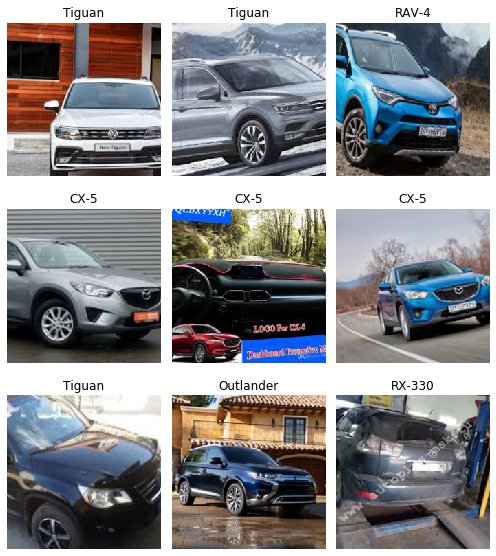

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
       ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
       
data.classes
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds) # размеры обучающей и тестовой выборок
learn = cnn_learner(data, models.resnet50, metrics=error_rate) # используем стандартную модель resnet34
learn.fit_one_cycle(16) # первая итерация обучения



epoch,train_loss,valid_loss,error_rate,time
0,3.118352,1.895295,0.645833,00:10
1,2.563915,1.688017,0.494792,00:10
2,2.165566,1.784809,0.463542,00:10
3,1.850485,1.963105,0.473958,00:10
4,1.599433,1.809862,0.458333,00:10
5,1.397186,1.724609,0.442708,00:10
6,1.228630,1.618822,0.421875,00:10
7,1.073493,1.599021,0.427083,00:10
8,0.929159,1.422244,0.380208,00:10
9,0.832913,1.389521,0.375000,00:10


Попробуем тонкую настройку (fine-tuning).

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


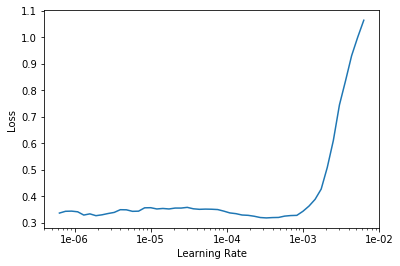

In [13]:
learn.save('stage-1') # сохраним первый промежуточный результат
learn.unfreeze() # разморозка всей модели
learn.lr_find() # анализ диапазона скоростей обучения
# Если lr_find() отработала неуспешно, можно явно задать предполагаемый диапазон:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)

learn.recorder.plot()


In [14]:
learn.fit_one_cycle(6, max_lr=slice(1e-6,1e-4)) # задаём визуально подходящий диапазон скорости обучения
learn.save('stage-2') # сохраним вторые промежуточные результаты

epoch,train_loss,valid_loss,error_rate,time
0,0.366853,1.306860,0.359375,00:11
1,0.338314,1.289904,0.359375,00:10
2,0.341352,1.265790,0.354167,00:10
3,0.317960,1.270375,0.359375,00:10
4,0.317226,1.257339,0.359375,00:11
5,0.305705,1.252732,0.359375,00:11


Интерпретация результатов обучения

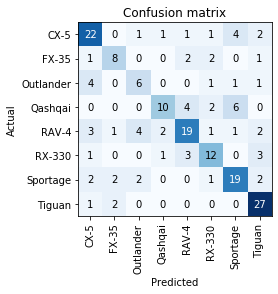

In [16]:
learn.load('stage-2');
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix() # смотрим на матрицу ошибок

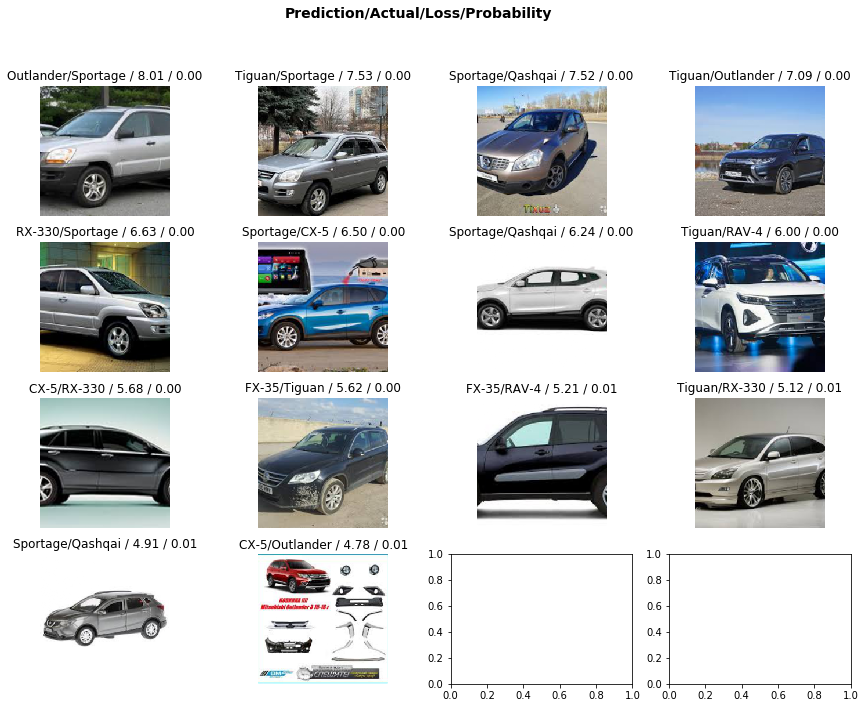

In [17]:
interp.plot_top_losses(14, figsize=(15,11)) #смотрим на ошибки

Готовим модель к продакшену

In [0]:
learn.export()

В рабочем каталоге будет создан файл export.pkl, который содержит всю необходимую информацию для использования модели.

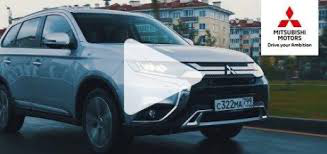

In [22]:
defaults.device = torch.device('cpu') # задаём в качестве девайса обычный процессор
img = open_image(path/'Outlander'/'00000039.jpg') # выберем случайную картинку
img

In [23]:
learn = load_learner(path)
pred_class,pred_idx,outputs = learn.predict(img) # выполняем классификацию локального изображения
pred_class # должно получиться RAV-4

Category Outlander